# Desafío N° 1 - Data Wrangling - Grupo # 8

Esta notebook va a llevar a adelante el Desafío N° 1 del curso de DataScience sobre un dataset correspondiente a la web Properati donde se publican inmuebles de todo el país


# Tabla de Contenido

[Tareas Iniciales](#Tareas_iniciales)

[Eliminar columnas no relevantes](#Eliminar_columnas)

[Análisis sobre CABA](#Analisis_CABA)

[Tratamiento de valores outliers](#Tratamiento_outliers)


[EDA - Missing Data](#EDA_Faltantes)

   [Adaptacion Nombres Columnas](#Adaptacion_Nombres)
    
   [Análisis contenido Descripción y Título](#Descr_Tit)
 

<a id="Tareas_iniciales"></a> 
# Tareas iniciales


In [2]:
# En primer lugar importamos las librerias con las que vamos a trabajar a lo largo del proyecto

import pandas as pd
import numpy as np
import seaborn as sns
import re
import scipy

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)


In [3]:
# Es necesario importar el dataset con el cual vamos a trabajar

file_path = "properati.csv"
data = pd.read_csv(file_path, sep = "," )
print(data.shape)
data.head(2)

(121220, 26)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


In [4]:
data.dtypes.value_counts()

float64    13
object     12
int64       1
dtype: int64

Se observa que el dataset cuenta con 121000 observaciones y 26 variables, de las cuales 13 son numeros reales, 12 son strings y 1 es un entero (esta igual debemos removerla ya que se trata de un indice innecesario)

In [5]:
# Procedemos a remover la primer columna del dataset
data = data.iloc[:,1:]
data.head(2)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


In [5]:
# Algo interesante para mirar sería el tipo de dato que tiene cada variable

print(data.dtypes)
print("\n")

# Y también ver como se distribuyen los datos que son numericos
data.info()

operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: object


<class 'pandas.core.frame.DataFram

<a id="Eliminar_columnas"></a> 
## Eliminación columnas no relevantes

Se ve que hay algunas columnas que parecen no aportar mucha información al dataset, mas bien redundan basadas en otras columnas
En este sentido esto va en contra de la idea de "tidy data".
Sería una buena idea remover estas columnas

Por otro lado hay columnas muy poco relevantes como por ejemplo el URL de la publicación o el URL de las fotos presentes en el dataset. A simple vista se ve que esto no puede ser manejado por ningún modelo predictivo.
También seria relevanete remover estas columnas

In [9]:
data.drop(['place_with_parent_names', 'lat-lon'], axis = 1, inplace= True)
data.drop(['properati_url', 'image_thumbnail'], axis = 1, inplace= True)

<a id="Analisis_CABA"></a> 
## Análisis general sobre CABA


Dado que el dataset es sustancialemnte grande y con gran variabilidad en la completitud de los datos, decidimos enfocar nuestro análisis sobre una región en particular: Capital Federal, ya que es la región que aglomera la mayor cantidad de publicaciones

In [13]:
data.state_name.value_counts().head(4)

Capital Federal             32316
Bs.As. G.B.A. Zona Norte    25560
Bs.As. G.B.A. Zona Sur      13952
Córdoba                     12069
Name: state_name, dtype: int64

In [14]:
states = ["Capital Federal"]

mask = [(x in states) for x in data.state_name]

data2 = data.loc[mask,:]
data2.sample(3)

,operation,property_type,place_name,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
13607,sell,house,Capital Federal,Argentina,Capital Federal,3433955.0,-34.633159,-58.374514,1200000.0,USD,21173400.0,1200000.0,1079.0,450.0,1112.140871,2666.666667,NaN,NaN,NaN,EXCELENTE PROPIEDAD EN LA MEJOR UBICACION. EXC...,Casa 1079m² con Cochera en Isabel La Catolica ...
118250,sell,apartment,Palermo,Argentina,Capital Federal,3430234.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,52.0,NaN,NaN,NaN,NaN,NaN,Una esquina soñada frente a Plaza Guadalupe.Un...,Departamento - Palermo
91142,sell,apartment,Caballito,Argentina,Capital Federal,3435874.0,-34.627311,-58.429601,105508.0,USD,1861635.9,105508.0,43.0,36.0,2453.674419,2930.777778,NaN,NaN,NaN,Situado en un único lote de más de 3.900 m2 de...,Monoambiente divisible en Caballito


<a id="Tratamiento_outliers"></a> 
# Tratamiento de valores Outliers

Al análizar los datos de superficie de los inmuebles según el tipo de propiedad, vemos que para los departamentos existen valores muy por encima de lo esperable en terminos del rango de valores. 

In [15]:
# Superfice cubierta en m2
# maximo = data2.surface_covered_in_m2.max()
# data2['surface_covered_in_m2'] = data2.surface_covered_in_m2.replace(maximo, np.NaN)

remplazo = data2[(data2.property_type == 'apartment') & (data2.surface_covered_in_m2 > 2000)].surface_covered_in_m2 / 100

prueba = pd.merge(data2, remplazo, right_index= True, left_index= True, suffixes=("","_new"), how = 'left')
prueba

data2['surface_covered_in_m2'] = prueba.surface_covered_in_m2_new.fillna(prueba.surface_covered_in_m2)

<ipython-input-15-2487baeb0513>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['surface_covered_in_m2'] = prueba.surface_covered_in_m2_new.fillna(prueba.surface_covered_in_m2)


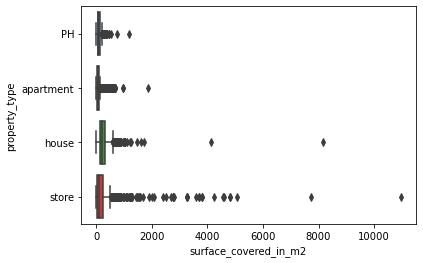

In [16]:
sns.boxplot(x = data2.surface_covered_in_m2, y = data2.property_type)

<ipython-input-17-b2f42a398378>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['surface_total_in_m2'] = prueba.surface_total_in_m2_new.fillna(prueba.surface_total_in_m2)


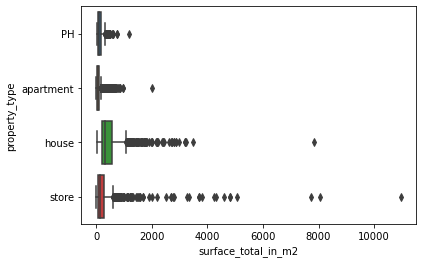

In [17]:
# maximo = data2.surface_total_in_m2.max()
# data2['surface_total_in_m2'] = data2.surface_total_in_m2.replace(maximo, np.NaN)

remplazo = data2[(data2.property_type == 'apartment') & (data2.surface_total_in_m2 > 2000)].surface_total_in_m2 / 100

prueba = pd.merge(data2, remplazo, right_index= True, left_index= True, suffixes=("","_new"), how = 'left')
prueba

data2['surface_total_in_m2'] = prueba.surface_total_in_m2_new.fillna(prueba.surface_total_in_m2)

sns.boxplot(data2.surface_total_in_m2, data2.property_type)

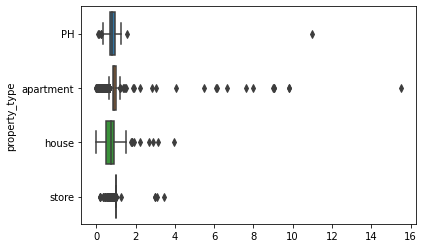

In [18]:
por_sup_cubierta = data2.surface_covered_in_m2/data2.surface_total_in_m2
por_sup_cubierta.describe()

sns.boxplot(x = por_sup_cubierta, y = data2.property_type)

In [19]:
data2[por_sup_cubierta > 3]

,operation,property_type,place_name,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
8924,sell,PH,Saavedra,Argentina,Capital Federal,3429422.0,-34.555993,-58.477914,250000.0,USD,4411125.00,250000.00,10.0,110.0,25000.000000,2272.727273,NaN,NaN,NaN,CODIGO: 1974-597 ubicado en: Nuñez 3600 - Pub...,"PH 4 Amb. Patio, Toilet, Dep. muy luminoso."
9866,sell,store,Capital Federal,Argentina,Capital Federal,3433955.0,NaN,NaN,350000.0,USD,6175575.00,350000.00,40.0,123.0,8750.000000,2845.528455,NaN,NaN,NaN,Local en EDIFICIO lomas Parck muy bien ubicado...,"Local 40m² con Plantas en Sucre, Av. 1600, Arg..."
17397,sell,apartment,Coghlan,Argentina,Capital Federal,3435359.0,-34.557157,-58.479782,178000.0,USD,3140721.00,178000.00,14.0,86.0,12714.285714,2069.767442,NaN,NaN,NaN,CODIGO: 1974-611 ubicado en: Washington 3500 -...,Dpto de 4 Amb. Contra frente con Balcon
21531,sell,apartment,Recoleta,Argentina,Capital Federal,3429595.0,-34.593267,-58.412733,330000.0,USD,5822685.00,330000.00,10.0,155.0,33000.000000,2129.032258,NaN,NaN,12000.0,CODIGO: 1819-CON555 ubicado en: Billinghurst 1...,Billinghurst y Mansilla. Piso 165 m2. 4 Dorm. ...
33389,sell,store,Monserrat,Argentina,Capital Federal,3430570.0,-34.612402,-58.387897,390000.0,USD,6881355.00,390000.00,106.0,363.0,3679.245283,1074.380165,NaN,NaN,NaN,"DISPOSICION: Al frente, 4 pisos con 20 habitac...",Venta PH c/20 habitaciones U$S 390.000 en More...
36888,sell,apartment,Palermo,Argentina,Capital Federal,3430234.0,NaN,NaN,250000.0,USD,4411125.00,250000.00,13.0,79.0,19230.769231,3164.556962,1.0,NaN,NaN,Edificio ubicado sobre Scalabrini Ortiz entre ...,Departamento 13m² con Teléfono en Scalabrini O...
45764,sell,apartment,Palermo Hollywood,Argentina,Capital Federal,NaN,-34.573569,-58.438419,1759100.0,ARS,1810560.54,102613.31,37.0,335.0,2773.332703,5251.044776,1.0,NaN,NaN,Excelente Monoambiente NUEVO en el moderno com...,Departamento 37m² con Plantas en Cabildo Av. 2...
45765,sell,apartment,Palermo Hollywood,Argentina,Capital Federal,NaN,-34.573569,-58.438419,1920000.0,ARS,1976167.41,111999.06,37.0,335.0,3027.001622,5731.343284,7.0,NaN,NaN,Excelente Monoambiente NUEVO en el moderno com...,Departamento 37m² con Plantas en Cabildo Av. 2...
45774,sell,apartment,Villa Urquiza,Argentina,Capital Federal,3433775.0,-34.573217,-58.473208,6391756.0,ARS,6578739.82,372849.32,121.0,965.0,3081.399339,6623.581347,6.0,NaN,NaN,DEPARTAMENTO EN VENTA HOLMBERG ON!FINANCIACIÃN...,Departamento 121m² con Plantas en Echeverria 4...
46473,sell,apartment,Belgrano,Argentina,Capital Federal,3436077.0,NaN,NaN,198000.0,USD,3493611.00,198000.00,10.0,90.0,19800.000000,2200.000000,5.0,NaN,NaN,Edificio ubicado en la calle Sucre entre Av. d...,"Departamento 10m² con 6 Plantas en Sucre, Mcal..."


0         1127.272727
2         1309.090909
3                 NaN
7                 NaN
8                 NaN
             ...     
121160            NaN
121209            NaN
121215            NaN
121217            NaN
121219    1675.324675
Name: price_usd_per_m2, Length: 32316, dtype: float64

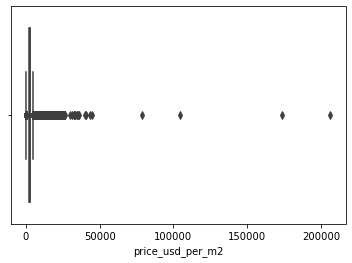

In [20]:
# Superfice cubierta en m2
sns.boxplot(data2.price_usd_per_m2)

mediana = data2.surface_covered_in_m2.median()
q25 = data2.price_usd_per_m2.describe().loc["25%"]
q75 = data2.price_usd_per_m2.describe().loc["75%"]
IQR = q75 - q25

sin_out = data2.price_usd_per_m2.apply(lambda x: np.NaN if ((x > mediana + IQR * 2) | (x < mediana - IQR * 2)) else x)
sin_out

<ipython-input-21-53a6cbea4862>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['price_usd_per_m2'] = data2.price_usd_per_m2.replace(maximo, np.NaN)


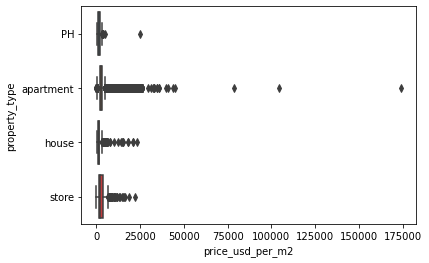

In [21]:
maximo = data2.price_usd_per_m2.max()
data2['price_usd_per_m2'] = data2.price_usd_per_m2.replace(maximo, np.NaN)

sns.boxplot(data2.price_usd_per_m2, data2.property_type)

<a id="EDA_Faltantes"></a> 
## EDA - Missing Data

Un análisis que es importante realizar es la presencia de datos faltantes que tiene el dataset.
A simple vista se ve que muchas de las variables numércias tienen varios valores faltantes, es necesario identificar que % de la data representa y si sería posible tomar una decisión de imputación.

Viendo los resultados mostrados en el gráfico, se puede observar que hay algunas variables con un importante % de valore faltantes (superiores al 50% de los datos - "floor", "expensas", "rooms"). En principio generar algún método de imputación parece ser muy complejo. Contamos tanto con la descripción de la publicación y con el título de la misma, por lo que se podría implementar un método regex para extraer estos datos

Con el resto de las variables numéricas podría intentar realziarse una imputación:
1. lon, lat: en estas variables no tiene tanto sentido ya que dependen mucho de la ubicación del inmueble y solo contambos con el barrio/ciudad. En caso de querer imputarlas podrían manejarse dos opciones
        1.a. poner la lon, lat que sale del barrio en Google Maps
        1.b. buscar en las descripciones los nombres de las calles o la dirección y con API de GoogleMaps extraer lon, lat
        1.c. utilizar el dato de geonames para extraer la lat-lon y en los casos que falta completar con el promedio del barrio
2. Price: Tanto la Descripción como el Titulo contienen en varios casos este dato. Se extraeran los posibles valores y luego se imputarán sobre el precio. 
2. price_USD_per_m2: esto no es más que un cálculo en base a otras variables que también tienen datos faltantes, de ser posible estimar las anteriores de podría completar en su totalidad
3. El resto de las variables con algunos de los mecanismos de imputación podrían resolverse

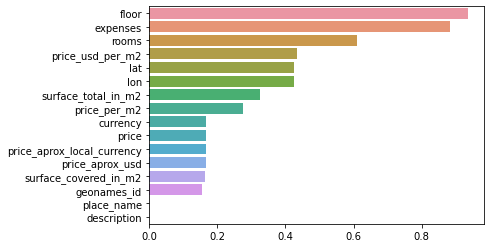

In [22]:
missing_data = data.isnull().sum(axis = 0) / data.shape[0]
missing_data.sort_values(inplace = True, ascending = False)
miss = missing_data[missing_data>0]

sns.barplot(y = miss.index, x = miss)

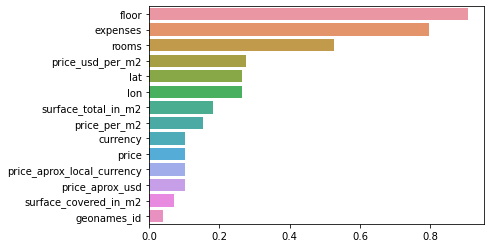

In [23]:
md2 = data2.isnull().sum(axis = 0) / data2.shape[0]
md2.sort_values(inplace = True, ascending = False)
miss2 = md2[md2>0]

sns.barplot(y = miss2.index, x = miss2)

En lineas generales Capital Federal y Bs.As. G.B.A. Zona Norte son las dos regiones que tienen menor cantidad de datos faltantes en cada una de las categorías de datos más importnates (precio, superficie, ambientes)

In [24]:
a = data.surface_covered_in_m2.isnull().groupby(data['state_name']).sum().sort_values(ascending = False)
b = pd.merge(a, data.state_name.value_counts(), left_index=True, right_index = True)
b["porcentaje_null"] = b.surface_covered_in_m2/b.state_name
b.porcentaje_null.sort_values().head()

Santiago Del Estero         0.000000
Bs.As. G.B.A. Zona Norte    0.069327
Capital Federal             0.072379
Corrientes                  0.125214
Bs.As. G.B.A. Zona Oeste    0.148251
Name: porcentaje_null, dtype: float64

<a id="Adaptacion_Nombres"></a> 
## Adaptación de nombres

Para poder manejarnos más facil vamos a adaptar los nombres de las columnas

In [25]:
data2.columns

Index(['operation', 'property_type', 'place_name', 'country_name',
       'state_name', 'geonames_id', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title'],
      dtype='object')

In [26]:
data2.columns
data2.columns = ['operacion', 'tipo_prop', 'barrio', 'pais', 'provincia', 'geoname', 'lat', 'lon', 
                 'precio', 'moneda', 'precio_pesos', 'precio_usd', 'sup_total', 'sup_cubierta', 'precio_usd_m2', 'precio_m2',
                'piso', 'ambientes', 'expensas', 'descripcion', 'titulo']

data2.columns

Index(['operacion', 'tipo_prop', 'barrio', 'pais', 'provincia', 'geoname',
       'lat', 'lon', 'precio', 'moneda', 'precio_pesos', 'precio_usd',
       'sup_total', 'sup_cubierta', 'precio_usd_m2', 'precio_m2', 'piso',
       'ambientes', 'expensas', 'descripcion', 'titulo'],
      dtype='object')

<a id="Descr_Tit"></a> 
## Análisis del contenido de descripción y título

### Ambientes

In [27]:
# Con el metodo extract se puede ubicar el primer elemento de la cadena de texto que cumple la condición planteada
# En algunos casos, en la descripción aparecen menciones amuchos tipos de dptos ya que suelen ser desarrollos inmobiliarios
# Por eso priorizamos el dato que viene del titulo y si este no tiene, completamos con el primer dato de la descripcion

a = data2.descripcion.str.extract("(?P<amb>\d{1,2})\s*amb|(?P<mono>mono)\S*amb", flags = re.IGNORECASE)

a['mono'] = a.mono.replace(re.compile("mono", flags = re.IGNORECASE), "1")

a['ambientes'] = a.amb.fillna(a.mono).astype(float)


b = data2.descripcion.str.extract("(?P<amb>\d{1,2})\s*amb|(?P<mono>mono)\S*amb", flags = re.IGNORECASE)

b['mono'] = b.mono.replace(re.compile("mono", flags = re.IGNORECASE), "1")

b['ambientes'] = b.amb.fillna(b.mono).astype(float)


ambientes = b.ambientes.fillna(a.ambientes)

ambientes

0         2.0
2         2.0
3         3.0
7         1.0
8         NaN
         ... 
121160    NaN
121209    NaN
121215    NaN
121217    1.0
121219    NaN
Name: ambientes, Length: 32316, dtype: float64

In [28]:
data_ambientes = data2.join(ambientes, rsuffix="_nuevo")

data_ambientes['ambientes2'] = data_ambientes.ambientes_nuevo.fillna(data_ambientes.ambientes)
print(data_ambientes.ambientes2.isnull().sum())
data_ambientes.loc[:,['ambientes', 'ambientes_nuevo', 'ambientes2']].sample(10)

7604


,ambientes,ambientes_nuevo,ambientes2
116420,1.0,NaN,1.0
93882,NaN,3.0,3.0
26270,2.0,2.0,2.0
95702,NaN,NaN,NaN
76547,NaN,NaN,NaN
102955,NaN,NaN,NaN
29582,2.0,NaN,2.0
33768,1.0,1.0,1.0
33656,2.0,NaN,2.0
70267,NaN,3.0,3.0


In [29]:
data = data_ambientes.drop(['ambientes', 'ambientes_nuevo'], axis = 1)
data = data.rename(columns = {'ambientes2': 'ambientes'})

### Piso del dpto

In [30]:
pisos = data.descripcion.str.extract("(\d)\s*er|(\d{1,2})\s*\wo|(\d)°|\s+(PB)\s+|(\w{5,10})\s+piso", flags = re.IGNORECASE)

pisos.iloc[:,3].value_counts()

pisos.iloc[:,3] = pisos.iloc[:,3].apply(lambda x: x if x is np.NaN else "0")

pisos.iloc[:,3].value_counts()

pisos['piso'] = pisos.iloc[:,0].fillna(pisos.iloc[:,1])
pisos['piso'] = pisos.piso.fillna(pisos.iloc[:,2])
pisos['piso'] = pisos.piso.fillna(pisos.iloc[:,3])

pisos.piso.value_counts()

2     4050
3     1676
1     1372
4      908
0      616
30     531
24     432
00     418
91     355
5      325
70     241
10     238
93     234
72     214
69     211
7      199
92     197
8      194
66     170
6      153
19     151
07     122
67     121
51     114
9      111
37      99
06      91
17      91
61      90
40      84
18      81
22      79
50      78
81      71
62      70
78      68
11      64
31      63
42      61
39      57
20      56
34      55
95      54
71      49
77      48
60      46
54      44
73      41
44      34
80      32
15      29
12      29
99      29
52      24
63      23
02      23
83      20
23      19
01      19
64      19
04      15
35      13
90      12
13      10
21      10
28      10
14      10
36       9
33       9
47       9
85       9
09       7
16       7
55       7
25       6
08       6
05       6
27       6
38       5
75       4
57       4
26       4
41       3
32       3
86       3
74       3
84       3
53       2
87       2
56       2
58       2

In [31]:
indice = ['primer', 'segundo', ' tercer', 'cuarto', 'quinto', 'sexto', 'ptimo', 'octavo', 'noveno']
numero = [1,2,3,4,5,6,7,8,9]

for pis,numero in zip(indice,numero):
    a = pisos.iloc[:,4].str.contains(pis, flags = re.IGNORECASE)
    b = a.apply(lambda x: numero if x is True else np.NaN)
    c = c.fillna(b)

pisos['piso'] = pisos.piso.fillna(c)
pisos['piso'] = pisos.piso.astype(float)

NameError: name 'c' is not defined

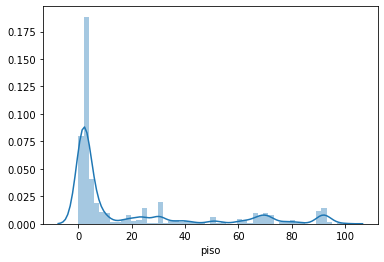

In [32]:
sns.distplot(pisos.piso)

In [33]:
data['piso'] = data.piso.fillna(pisos.piso)

### Precios en USD a partir de la Descripción / Título 

Tanto las columnas Descripcion como Título, contienen en muchos casos el valor del Precio Total del inmueble. Se puede utilizar este dato para imputar el Precio, en el caso de que este fuera un valor faltante.  

In [34]:
#Extraccion desde Title
desc5 = re.compile("\s*(?P<preciousd>(U\$D\s*\d*[.]\d*)|(U\$S\s*\d*[.]\d*))" , flags =  re.IGNORECASE)
usd_title_s = data2.titulo.apply(lambda x:  re.search(desc5, x))
usd_title = usd_title_s.apply(lambda x: x if x is None else x.group("preciousd"))

desc6 = re.compile("\d*[.]\d*")
p_usd2a = usd_title.apply(lambda x: np.NaN if x is None  else re.search(desc6, x)[0])
p_usd2 = p_usd2a.apply(lambda x: x if x is np.NaN else re.sub("[.]", "", x))
p_usd2 = p_usd2[p_usd2.notna()].astype(int)

In [35]:
#Extraccion desde Descripcion
desc7 = re.compile("\s*(?P<preciousd>(U\$D\s*\d*[.]\d*)|(U\$S\s*\d*[.]\d*))" , flags =  re.IGNORECASE)
usd_desc_s = data2.descripcion.apply(lambda x:  re.search(desc7, x))
usd_desc = usd_desc_s.apply(lambda x: x if x is None else x.group("preciousd"))

desc8 = re.compile("\d*[.]\d*")
p_usd1a = usd_desc.apply(lambda x: np.NaN if x is None  else re.search(desc8, x)[0])
p_usd1 = p_usd1a.apply(lambda x: x if x is np.NaN else re.sub("[.]", "", x))

In [36]:
#generamos el listado de registros que tienen precio en Descripcion o en Titulo
p_usd = pd.merge(p_usd1[p_usd1.notna()], p_usd2[p_usd2.notna()], left_index = True, right_index = True, how = "outer")
p_usd.columns = ['p_usd_desc','p_usd_tit']

#agregamos los precios obtenidos al dataset de CABA.
data2 = pd.merge(data2, p_usd, right_index= True, left_index= True, suffixes=("","_new"), how = 'left')

#totamos el precio de titulo, y si el valor no está, el que obtuvimos de la columna descripción
data2['precio_extr_usd'] = data2.apply((lambda x: x['p_usd_tit'] if pd.notna(x['p_usd_tit']) else x['p_usd_desc']), axis = 1)



Se encontraron 367 inmbuebles para inputar el Precio

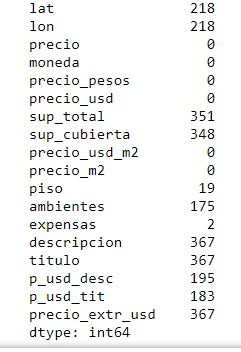

In [46]:
#convierto a float los no NaN de la nueva columna
data2['precio_extr_usd'].notna().astype(float)
#se encontraron registros para 367 propiedades en CABA que podrían imputarse
data2[(data2.precio_extr_usd.notna()) & (data2.precio.isna())].count()


operacion          0
tipo_prop          0
barrio             0
pais               0
provincia          0
geoname            0
lat                0
lon                0
precio             0
moneda             0
precio_pesos       0
precio_usd         0
sup_total          0
sup_cubierta       0
precio_usd_m2      0
precio_m2          0
piso               0
ambientes          0
expensas           0
descripcion        0
titulo             0
p_usd_desc         0
p_usd_tit          0
precio_extr_usd    0
dtype: int64

In [54]:
#como último paso imputamos el precio obtenido sobre la columna de precio original faltante, para luego poder calcular el precio x m2
data2['precio'] = data2.precio.fillna(data2.precio_extr_usd)
#eliminamos las columnas auxilialres del dataset
data2.drop(['p_usd_desc', 'p_usd_tit', 'precio_extr_usd'], axis = 1, inplace= True)


## ¿Qué pasa con las variables numéricas?

Una vez realizados los pasos anteriores, nos interesa analizar en detalle algunas variables basntante importantes para predecir el precio (suponiendo que ese es el objetivo final). Tomamos una serie de decisiones:
1. Se ve que cuando una propiedad no tiene datos en la columna "precio", tampoco presenta ningún dato relacionado con el mismo. En este caso se deberá analizar la imputación para los casos que tengan algún dato de superficie (total o cubierta) en base al barrio, el tipo de propiedad y el precio_promedio_barrio_propiedad

2. La columna de "precio_m2" lo unico que mira es el precio publicado dividido por la sup cubierta (precio/sup_cubierta). Esto no es muy consistente ya que mezcla tipos de monedas. De ser posible lo ideal va a ser eliminarla

3. Dentro de la parte que hace referenia a la superficie de las propiedades, hay mucha info faltante referida tanto a la superficie total como a la cubierta. Generalemnte la relación entre ambas tiene que ver con el tipo de propiedad y la zona (los dptos en Recoleta no suelen tener balcones y x lo tanto la sup total es parecida a la cubierta, mientras que un PH en Villa Urquiza puede tener un patio más grande). Imputamos el dato que falta (sea el total o el cubierto) en base a lo anterior


### 1. Precios - Conversión USD/$

Se puede tomar como TC promedio 17,76 ya que es el valor que se usa en todo el dataset

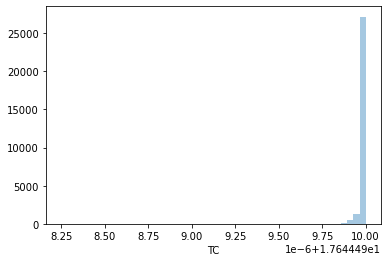

In [56]:
data2['TC'] = data2.precio_pesos / data2.precio_usd

data2.loc[:,['precio', 'precio_usd', 'precio_pesos', 'TC']].describe()

sns.distplot(data2['TC'], kde= False)

In [57]:
# Todos los valores que no tienen precio, tampoco tienen ningun dato en las columnas de precio y precio_usd

print(data[(data2.precio.isnull()) & (data2.precio_usd.isnull())].shape[0])
print(data[data2.precio.isnull()].shape[0])

2931
2931


### 2. Lat y lon

In [51]:
# importamos el achivo
data_location = "../geo2.csv"
datageo = pd.read_csv(data_location,  sep=';')

datageo.geonameid.astype(float)

FileNotFoundError: [Errno 2] File ../geo2.csv does not exist: '../geo2.csv'

In [ ]:
data = pd.merge(data, datageo, how = "left", left_on = "geonames_id", right_on = "geonameid")
print(data.head(2))

data['lat'] = data["lat"].fillna("latitude", inplace = True) 
data['lon'] = data["lon"].fillna("longitude", inplace = True)

In [127]:
# Completamos con el promedio de cada barrio. Otra opción podría haber sido utilziar el baricentro del barrio, pero no tenía ganas de buscarlo

lat_prom = data.groupby('barrio')['lat'].transform(lambda x: x.mean())
lon_prom = data.groupby('barrio')['lon'].transform(lambda x: x.mean())

data['lat'] = data.lat.fillna(lat_prom)
data['lon'] = data.lon.fillna(lon_prom)

### 3. Análisis sobre la superficie de los inmuebles

,lat,lon,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_m2,precio_m2,piso,ambientes,expensas,descripcion,titulo,TC
101838,NaN,NaN,87000,USD,1535071.50,87000.0,36.0,NaN,2416.666667,NaN,NaN,NaN,NaN,"Departamentos de un ambiente grande divisible,...",Departamento - Belgrano,17.6445
10418,-34.554245,-58.455398,208000,USD,3670056.00,208000.0,NaN,NaN,NaN,NaN,NaN,NaN,3500.0,Dúplex.Departamento.Frente.Orientación Sudeste...,DEPARTAMENTO EN VENTA,17.6445
75317,-34.655860,-58.517232,280000,USD,4940460.00,280000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCELENTE CASA EN ESQUINA CON COCHERA P/2 AUTO...,Bº NAON-CASA 5 AMB-GJE 2 AUTOS-,17.6445
73315,-34.579227,-58.490459,420000,USD,7410690.00,420000.0,150.0,NaN,2800.000000,NaN,NaN,NaN,NaN,5 AMBIENTES A ESTRENAR EN EDIFICIO DE CATEGO...,Departamento - Urquiza R,17.6445
85078,NaN,NaN,280000,USD,4940460.00,280000.0,299.0,NaN,936.454849,NaN,NaN,NaN,NaN,"A metros del Complejo de Catalinas Sur, Centro...",Casa / Lote - La Boca,17.6445
112396,-34.587950,-58.395243,88000,USD,1552716.00,88000.0,26.0,NaN,3384.615385,NaN,NaN,NaN,1100.0,Barrio Norte RECOLETA A Mts.Avenida Pueyrredon...,Departamento - Recoleta,17.6445
93760,NaN,NaN,480000,USD,8469360.00,480000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCELENTE ESQUINA LOTE PROPIO DE 8 X 16 APROX ...,Local en Villa Crespo,17.6445
13447,-34.599162,-58.371498,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,"Ideal Estudiante. Monoambiente de Categoría, f...",Monoambiente de Categoría en Buenos Aires- Mon...,NaN
71900,NaN,NaN,1.65e+06,USD,29113425.00,1650000.0,488.0,NaN,3381.147541,NaN,NaN,NaN,NaN,"INCREIBLE PROPIEDAD ÚNICA EN SU TIPO, SOLO PAR...",Excepcional departamento en Duplex Unico en su...,17.6445
96095,NaN,NaN,220575,USD,3891935.58,220575.0,51.0,NaN,4325.000000,NaN,NaN,NaN,NaN,"Edificio en torre de 29 pisos, 10 departamento...",Departamento - Nuñez,17.6445


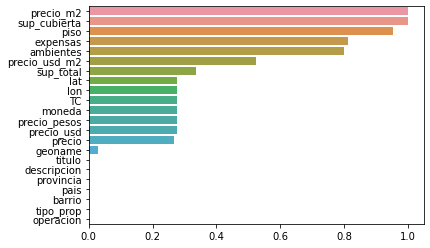

In [58]:
miss = data2[data2.sup_cubierta.isnull()].isnull().sum() / data2[data2.sup_cubierta.isnull()].shape[0]
miss.sort_values(ascending=False, inplace = True)

sns.barplot(y = miss.index, x= miss)

data2[data2.sup_cubierta.isnull()].sample(10).iloc[:,6:]

In [59]:
data2['prueba'] = data2.sup_cubierta/data2.sup_total
data2.groupby(['tipo_prop', 'barrio'])['sup_total'].mean()

data2['prueba2'] = data2.groupby(['tipo_prop', 'barrio'])['prueba'].transform(lambda x: x.mean())
data2['sup_total_2'] = data2.sup_total.fillna(data2.sup_cubierta / data2.prueba2)
data2['sup_cubierta_2'] = data2.sup_cubierta.fillna(data2.sup_total * data2.prueba2)


print(data2.sup_total_2.isnull().sum())
print(data2.sup_cubierta_2.isnull().sum())
data2.loc[:,['tipo_prop', 'barrio', 'sup_total', 'sup_cubierta', 'sup_total_2', 'sup_cubierta_2']]

790
786


,tipo_prop,barrio,sup_total,sup_cubierta,sup_total_2,sup_cubierta_2
0,PH,Mataderos,55.0,40.0,55.0,40.000000
2,apartment,Mataderos,55.0,55.0,55.0,55.000000
3,PH,Liniers,NaN,NaN,NaN,NaN
7,apartment,Belgrano,45.0,40.0,45.0,40.000000
8,apartment,Belgrano,65.0,60.0,65.0,60.000000
...,...,...,...,...,...,...
121160,apartment,Belgrano,157.0,NaN,157.0,138.757336
121209,apartment,Belgrano,157.0,NaN,157.0,138.757336
121215,apartment,Belgrano,113.0,93.0,113.0,93.000000
121217,apartment,Villa Urquiza,46.0,39.0,46.0,39.000000


In [60]:
data2 = data2.drop(['sup_total', 'sup_cubierta'], axis = 1)
data2 = data2.rename({'sup_total_2': 'sup_total', 'sup_cubierta_2': 'sup_cubierta'}, axis = 1)

### 4. Análisis sobre los precio por m2

In [61]:
data2['precio_x_m2_usd'] = data2.precio_usd / data2.sup_total

data2['precio_prom'] = data2.groupby(['barrio', 'tipo_prop'])['precio_x_m2_usd'].transform(lambda x: x.mean())

data2['precio_x_m2_usd'] = data2.precio_x_m2_usd.fillna(data2.precio_prom)

In [62]:
data2['precio_usd'] = data2.precio_usd.fillna(data2.sup_total * data2.precio_x_m2_usd)

### 5. Dataset limpio

In [63]:
data2.columns

data2.drop(['operacion', 'provincia', 'geoname', 'precio', 'moneda', 'precio_pesos', 
           'precio_usd_m2', 'precio_m2', 'expensas', 'descripcion', 'titulo', 'TC', 
           'prueba', 'prueba2', 'precio_prom'], axis = 1)

,tipo_prop,barrio,pais,lat,lon,precio_usd,piso,ambientes,sup_total,sup_cubierta,precio_x_m2_usd
0,PH,Mataderos,Argentina,-34.661824,-58.508839,62000.0,NaN,NaN,55.0,40.000000,1127.272727
2,apartment,Mataderos,Argentina,-34.652262,-58.522982,72000.0,NaN,NaN,55.0,55.000000,1309.090909
3,PH,Liniers,Argentina,-34.647797,-58.516424,95000.0,NaN,NaN,NaN,NaN,1466.775587
7,apartment,Belgrano,Argentina,-34.559873,-58.443362,138000.0,NaN,NaN,45.0,40.000000,3066.666667
8,apartment,Belgrano,Argentina,-34.559873,-58.443362,195000.0,NaN,NaN,65.0,60.000000,3000.000000
...,...,...,...,...,...,...,...,...,...,...,...
121160,apartment,Belgrano,Argentina,-34.563685,-58.442683,410000.0,NaN,NaN,157.0,138.757336,2611.464968
121209,apartment,Belgrano,Argentina,-34.563685,-58.442683,410000.0,NaN,NaN,157.0,138.757336,2611.464968
121215,apartment,Belgrano,Argentina,NaN,NaN,870000.0,NaN,NaN,113.0,93.000000,7699.115044
121217,apartment,Villa Urquiza,Argentina,-34.570639,-58.475596,131500.0,NaN,NaN,46.0,39.000000,2858.695652


# ANEXO I: Imputer from sklearn library

Funciona bien para algunas variables que son numéricas. Es neceasrio pasar todos lso datos categóricos a numéricos para que los tome

In [100]:
data['tipo_prop'] = data.tipo_prop.astype('category')
data['barrio'] = data.barrio.astype('category')
data['moneda'] = data.moneda.astype('category')

probamos = data.drop(['operacion', 'pais', 'descripcion', 'titulo', 'provicnia'], axis = 1)

probamos['tipo_prop'] = probamos.tipo_prop.cat.codes
probamos['barrio'] = probamos.barrio.cat.codes
probamos['moneda'] = probamos.moneda.cat.codes

In [109]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=50, random_state=0)

imp.fit(probamos)

veamos = pd.DataFrame(imp.transform(probamos))

veamos.columns = probamos.columns
veamos.index = probamos.index
veamos['barrio'] = data.barrio
veamos['moneda'] = data.moneda
veamos['tipo_prop'] = data.tipo_prop
veamos

,tipo_prop,barrio,geoname,lat,lon,precio,moneda,precio_pesos,precio_usd,sup_total,sup_cubierta,precio_usd_m2,precio_m2,piso,expensas,ambientes,prueba,prueba2,sup_total_2
0,PH,Mataderos,3430787.0,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.0,55.000000,40.000000,1127.272727,1550.000000,11.095845,31140.543496,2.000000,0.727273,0.802674,55.000000
2,apartment,Mataderos,3430787.0,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.0,55.000000,55.000000,1309.090909,1309.090909,20.370324,30665.993410,2.000000,1.000000,0.840668,55.000000
3,PH,Liniers,3431333.0,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.0,312.516485,-151.391508,60234.945126,348530.637884,40.707655,9881.278972,3.000000,-15.231229,0.724995,309.970121
7,apartment,Belgrano,3436077.0,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.0,45.000000,40.000000,3066.666667,3450.000000,8.761273,10575.612225,1.000000,0.888889,0.883805,45.000000
8,apartment,Belgrano,3436077.0,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.0,65.000000,60.000000,3000.000000,3250.000000,5.464668,4757.921919,2.284650,0.923077,0.883805,65.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121160,apartment,Belgrano,3436077.0,-34.563685,-58.442683,410000.0,USD,7234245.00,410000.0,157.000000,112.498727,2611.464968,-231195.958417,9.486078,6300.000000,3.180385,4.506793,0.883805,157.000000
121209,apartment,Belgrano,3436077.0,-34.563685,-58.442683,410000.0,USD,7234245.00,410000.0,157.000000,112.498727,2611.464968,-231195.958417,9.486078,6300.000000,3.180385,4.506793,0.883805,157.000000
121215,apartment,Belgrano,3436077.0,-34.690358,-58.524300,870000.0,USD,15350715.00,870000.0,113.000000,93.000000,7699.115044,9354.838710,38.259387,10000.000000,6.722078,0.823009,0.883805,113.000000
121217,apartment,Villa Urquiza,3433775.0,-34.570639,-58.475596,131500.0,USD,2320251.75,131500.0,46.000000,39.000000,2858.695652,3371.794872,11.557279,18868.697075,1.000000,0.847826,0.854165,46.000000


## ANEXO II: Incorporar data de transporte público

In [31]:
subte = pd.read_csv('estaciones-de-subte.csv')
subte.head(2)

,long,lat,id,estacion,linea
0,-58.398928,-34.635750,1.0,CASEROS,H
1,-58.400970,-34.629376,2.0,INCLAN - MEZQUITA AL AHMAD,H


In [62]:
lista = []

for i in data.index:
    
    dist_lat = (subte.lat - data.lat[i]) * 111000
    dist_lon = (subte.long - data.lon[i]) * 111000
    norma = (dist_lat ** 2 + dist_lon ** 2) ** (1/2)
    
    cantidad_subte = len(norma[norma < 500])
    
    lista.append(cantidad_subte)

cantidad_subte = pd.Series(lista, index = data.index, name = 'subtes')

data = data.join(cantidad_subte)

In [60]:
bicis = pd.read_csv('estaciones_sistema_viejo.csv')
bicis.head(2)

,id_estacion,nombre_estacion,long_estacion,lat_estacion,domicilio_estacion,tipo_estacion,observaciones,horario_estacion
0,1.0,Facultad de Derecho,-58.392452,-34.583133,Av. Pres.Figueroa Alcorta y Juan A.Bibiloni,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),Estación automática: disponibilidad las 24 horas
1,2.0,Retiro,-58.374822,-34.592589,Av. Dr.Jose Ramos Mejia y Del Libertador Av,AUTOMÁTICA,Abril 2015 (pasó de ser Manual a Automática),Estación automática: disponibilidad las 24 horas


In [63]:
lista = []

for i in data.index:
    
    dist_lat = (bicis.lat_estacion - data.lat[i]) * 111000
    dist_lon = (bicis.long_estacion - data.lon[i]) * 111000
    norma = (dist_lat ** 2 + dist_lon ** 2) ** (1/2)
    
    cantidad_bicis = len(norma[norma < 500])
    
    lista.append(cantidad_bicis)

cantidad_bicis = pd.Series(lista, index = data.index, name = 'bicis')

data = data.join(cantidad_bicis)

## ANEXO III: Incorporar data de Seguridad

In [64]:
comisarias = pd.read_csv('comisarias-policia-de-la-ciudad.csv')
comisarias.head(2)

,long,lat,id,nombre,calle,altura,calle2,direccion,telefonos,observaciones,observaciones_2,barrio,comuna,codigo_postal,codigo_postal_argentino
0,-58.373245,-34.601906,1,Comisaria Vecinal 1-D,Lavalle,451,NaN,LAVALLE 451,4322-8033/8221,NaN,NaN,SAN NICOLAS,1,1047.0,C1047AAI
1,-58.424926,-34.628641,37,Comisaria Vecinal 5-B,Muñiz,1250,NaN,MUÑIZ 1250,4922-1229 /4922-3333,NaN,NaN,BOEDO,5,1255.0,C1255ACD


In [66]:
lista = []

for i in data.index:
    
    dist_lat = (comisarias.lat - data.lat[i]) * 111000
    dist_lon = (comisarias.long - data.lon[i]) * 111000
    norma = (dist_lat ** 2 + dist_lon ** 2) ** (1/2)
    
    comisaria_dist_min = min(norma)
    
    lista.append(comisaria_dist_min)

comisaria_mas_cerca = pd.Series(lista, index = data.index, name = 'comisarias')

data = data.join(comisaria_mas_cerca)